### Clustering Analysis (Any one)
#### A. Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.
#### Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [2]:
!cp -r -f  /kaggle/input/iris /content

In [3]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment

In [4]:
oData = pd.read_csv("/content/iris/Iris.csv")

In [5]:
oData

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Overview of data
def OverViewOfData(oData):
  print("checking the null value in dataset:-")
  print(oData.isnull().sum())
  print("checking the duplicate value in dataset:-")
  print(oData.duplicated().sum())
  print("checking the shape of the data ")
  print("total rows:",oData.shape[0]," Total columns:",oData.shape[1])
  print("All About Data",oData.info())


In [7]:
OverViewOfData(oData=oData)

checking the null value in dataset:-
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
checking the duplicate value in dataset:-
0
checking the shape of the data 
total rows: 150  Total columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
All About Data None


In [8]:
def preprocess(df: pd.DataFrame):
    X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    encoder = LabelEncoder()
    y_true = encoder.fit_transform(df['Species'])

    return X_scaled, y_true, encoder.classes_

In [9]:
X_scaled, y_true, species = preprocess(oData)

In [10]:
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# Elbow Method to Find Optimal k
Wcss = []
iKRange = range(1,11)
for i in iKRange:
  km = KMeans(n_clusters=i, n_init=10, random_state=42)
  km.fit(X_scaled)
  Wcss.append(km.inertia_)

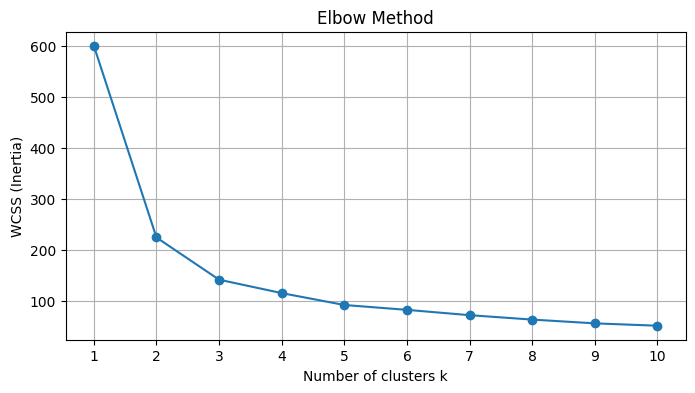

In [12]:
# 3. Plot WCSS vs. k
plt.figure(figsize=(8,4))
plt.plot(list(iKRange), Wcss, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.xticks(list(iKRange))
plt.grid(True)
plt.show()
plt.show()

In [13]:
k = 3
oKMeansFinal = KMeans(n_clusters=k,n_init=10,random_state=42)
y_pre = oKMeansFinal.fit_predict(X_scaled)

In [14]:
centroids = km.cluster_centers_

In [15]:
centroids

array([[-0.3813903 ,  2.28824475, -1.30065404, -1.20028561],
       [ 0.31517574, -0.17283408,  0.42744708,  0.33723572],
       [-1.37109761,  0.06560955, -1.33458232, -1.34391154],
       [ 0.92737322,  0.16681135,  0.95313513,  1.1850097 ],
       [ 0.32525258, -1.07779334,  0.74268839,  0.76738968],
       [ 1.92656914, -0.30493769,  1.42619186,  1.03892863],
       [-0.92491474,  1.0690817 , -1.28213207, -1.21305727],
       [-1.14301691, -1.74477836, -0.49965999, -0.41896053],
       [-0.32715325, -1.17398438,  0.1372359 ,  0.01051784],
       [ 2.12851559,  1.57199748,  1.50201279,  1.360307  ]])

In [16]:
y_pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
X_scaled[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [18]:
X_scaled[:,0][0]

np.float64(-0.9006811702978088)

In [19]:
X_scaled[:,2][0]

np.float64(-1.3412724047598314)

In [20]:
X_scaled[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

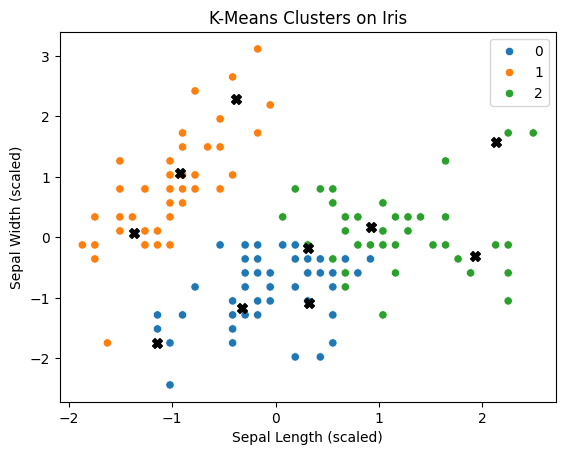

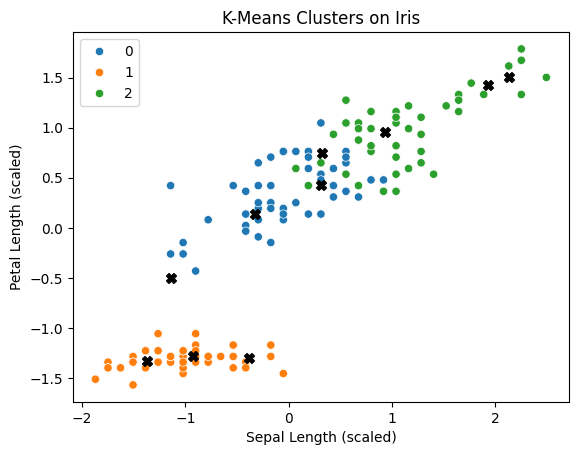

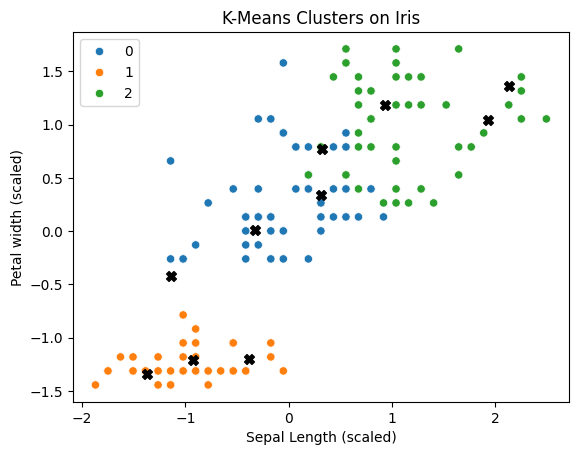

In [21]:

# Compare the SepalLengthCm and SepalWidthCm
sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,1],
    hue=y_pre,
    palette='tab10',
    legend='full'
)
plt.scatter(
    centroids[:, 0],          # x-coordinates of centroids
    centroids[:, 1],          # y-coordinates of centroids
    marker='X',               # cross-shaped marker
    s=50,                    # marker size
    c='black',                # color
    label='Centroids'
)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Means Clusters on Iris')
plt.show()

sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,2],
    hue=y_pre,
    palette='tab10',
    legend='full'
)
plt.scatter(
    centroids[:, 0],          # x-coordinates of centroids
    centroids[:, 2],          # y-coordinates of centroids
    marker='X',               # cross-shaped marker
    s=50,                    # marker size
    c='black',                # color
    label='Centroids'
)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.title('K-Means Clusters on Iris')
plt.show()


sns.scatterplot(
    x=X_scaled[:,0], y=X_scaled[:,3],
    hue=y_pre,
    palette='tab10',
    legend='full'
)
plt.scatter(
    centroids[:, 0],          # x-coordinates of centroids
    centroids[:, 3],          # y-coordinates of centroids
    marker='X',               # cross-shaped marker
    s=50,                    # marker size
    c='black',                # color
    label='Centroids'
)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('K-Means Clusters on Iris')
plt.show()


In [22]:
def align_labels(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(-cm)
    row_ind, col_ind = linear_sum_assignment(-cm)
    print(row_ind)
    print(col_ind)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    print(mapping)
    return np.vectorize(mapping.get)(y_pred)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_aligned = align_labels(y_true, y_pre)
print(y_aligned)

acc = accuracy_score(y_true, y_aligned)
sil = silhouette_score(X_scaled, y_pre)
cm = confusion_matrix(y_true, y_aligned)

# Calculate accuracy

print(f"Accuracy: {acc*100}%")

# Calculate confusion matrix
print("Confusion Matrix:")
print(cm)


from sklearn.metrics import silhouette_score

print(f"\nSilhouette Score: {sil*100}%")


[[ 0 50  0]
 [39  0 11]
 [14  0 36]]
[[  0 -50   0]
 [-39   0 -11]
 [-14   0 -36]]
[0 1 2]
[1 0 2]
{np.int64(1): np.int64(0), np.int64(0): np.int64(1), np.int64(2): np.int64(2)}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy: 83.33333333333334%
Confusion Matrix:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]

Silhouette Score: 45.897178670187174%
